# **Medición del periodo de un péndulo**


*Iván Doumerc, Universidad de Buenos Aires, Facultad de Ciencias Exactas y Naturales, Departamento de Física.*

## 1 *Introducción*

### 1.1 Introducción teórica

En este proyecto busco medir el *periodo de oscilación de un péndulo* y analizar su dependencia respecto de algunas variables.

Un **péndulo** es un sistema mecánico sencillo, compuesto por una cuerda de longitud $L$ , fijada en un extremo, y un peso colgado en el otro. Naturalmente, el peso se hayará colgando verticalmente y en reposo, pero si se lo aparta en un ángulo $\alpha$ respecto de la vertical, y se lo suelta, por acción de la gravedad el peso se moverá, en un movimiento que se conoce como *Movimiento oscilatorio* .


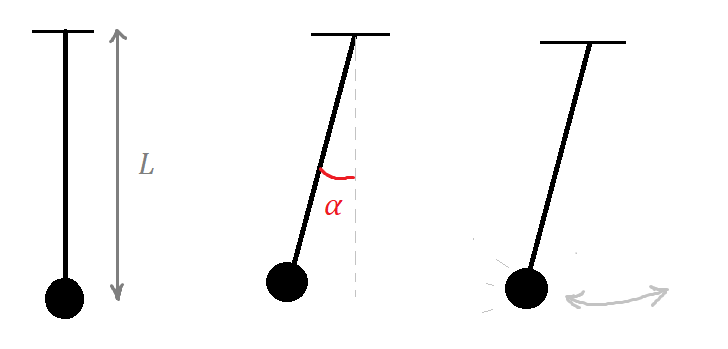

*Figura 1 :* Diagrama simplificado, representativo de un péndulo.

$\ $

Este tipo de movimiento mencionado, tiene la particularidad de ser *periódico* (es decir que se repite *periodicamente*). De esta manera se define, intuitivamente :

El **periodo de oscilación** de un péndulo es el tiempo que tarda el peso en ir y volver hasta la posición desde donde se lo soltó. Se lo nota con la letra $T$.

$\ $


La teoría afirma que, si el angulo inicial $\alpha$ es pequeño, el periodo de un péndulo resulta :


$$T=2\pi\sqrt{\frac{L}{g}}$$

de lo que simplemente interesa observar por ahora el hecho de que no depende del peso ni de $\alpha$ (mientras sea pequeño) pero si de $L$ : concretamente a mayor $L$ mayor $T$. Tambien depende de $g$, la aceleración de la gravedad, pero no interesa porque es constante.


### 1.2 Objetivos


Los objetivos concretos de este proyecto son :     

- Medir el periodo de un péndulo
- Evaluar su dependencia, respecto de $L$ y de $\alpha$
- Comparar las conclusiones experimentales, con lo predicho por la teoría

### 1.3 Descripción experimental

Para conseguir lo planteado, se realizó 3 mediciones de $T$, para distintos armados del péndulo. A continuación se describe el método de medición y los experimentos :

- El **método de medición** constó en usar un cronometro online, y medir el periodo de múltiples oscilaciones consecutivas, manualmente.

- Los **experimentos** constaron en variar $\alpha$ y $L$ para posteriormente analizar su impacto en $T$. Concretamente :

  $\ $

| Experimento | Longitud $L$ $(cm)$ | Angulo $\alpha (°)$ |
|-------------|-----------          |-----------           |
|$1$          |$$76,5$$             |   $$45$$             |
|$2$          |$$40,5$$             |  $$90$$              |
|$3$          |$$76,5$$             |  $$90$$               |


## 2 *Desarrollo*


### 2.1 Carga de datos

En primera instancia se importan las librerias que se van a utilizar :

In [ ]:
#Importación de librerias

import matplotlib.pyplot as plt
import numpy as np
import os

Luego se cargan los datos en crudo, de mediciones de periodo de cada experimento. Esto resulta muy sencillo puesto que los datos estan en formato `.txt` y solo contienen una columna de datos (el periodo, en segunods) y no tienen encabezados.

In [ ]:
#Cargado de datos

def subir(n):
  return np.loadtxt(f"T{n}.txt")

T=[subir(i) for i in range(1,4)]

donde `T` resulta una `list` de 3 `arrays` de `Numpy` que tienen los datos de las mediciones de $T$ de cada experiencia.






### 2.2 Evaluación de dependencia de  $T$ respecto de parámetros

A continuación se grafican, con el uso de funciones de `matplotlib`, los datos de cada experimento, de $T$ en función del número de medición :

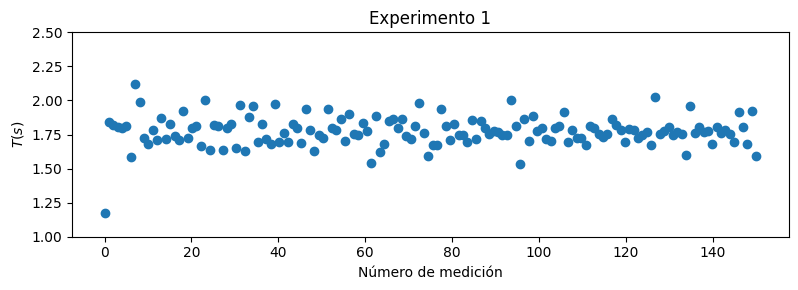

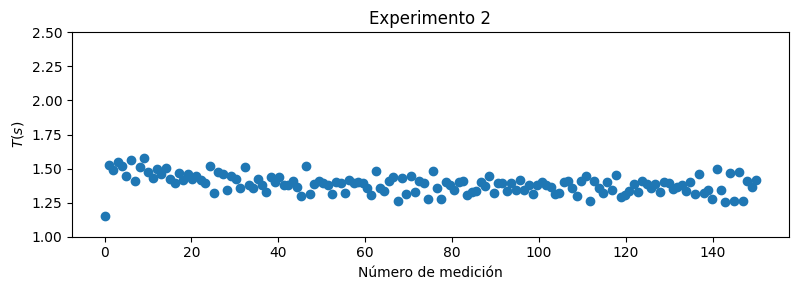

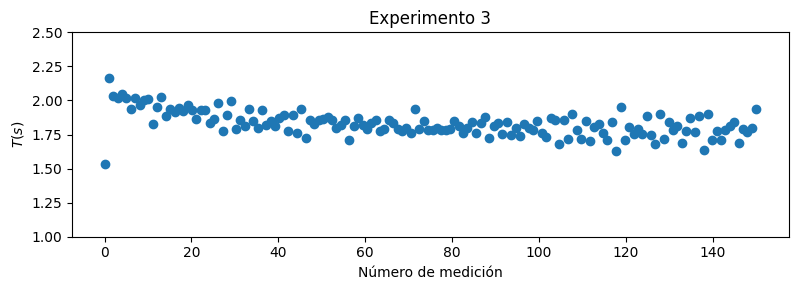

In [ ]:
#Creacion de carpeta para guardar imagenes

os.makedirs("resultados", exist_ok=True)
os.makedirs("resultados/crudo", exist_ok=True)

#Gráfico de los datos en crudo

for i in range(0,3) :

  plt.figure(figsize=(8,3))
  plt.scatter(np.linspace(0,len(T[i]),len(T[i])),T[i])
  plt.title(f"Experimento {i+1}")
  plt.xlabel("Número de medición")
  plt.ylabel("$T(s)$")
  plt.ylim(1,2.5)
  plt.tight_layout()
  plt.savefig(f"resultados/crudo/Experimento_{i+1}_crudo.png",dpi=200, bbox_inches="tight")
  plt.show()

donde se puede ver que, a excepción del primer dato, $T$ sigue una distribución marcada, con algo de ruido, en función del avance del n úmero de medición. Esto puede deberse a un _error sistemático_ que impacta solo en el primer dato. Para arreglarlo, se tomará a todas las mediciones salvo la primera  :    

In [ ]:
#Limpieza: Borrado del primer dato

def limpia(X):
  return X[1::]

T=[limpia(T[i]) for i in range(3)]


Y se vuelve a graficar

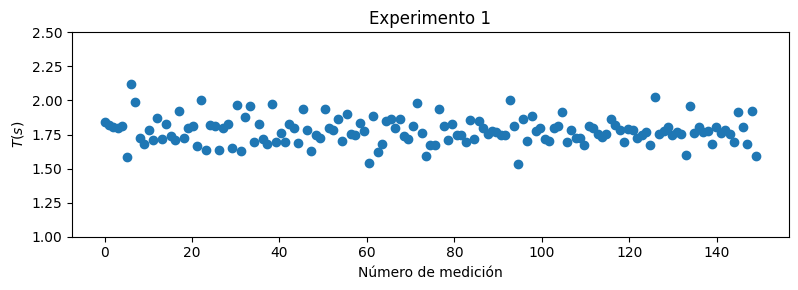

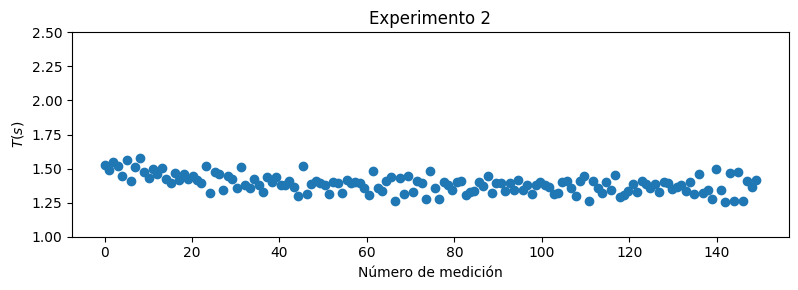

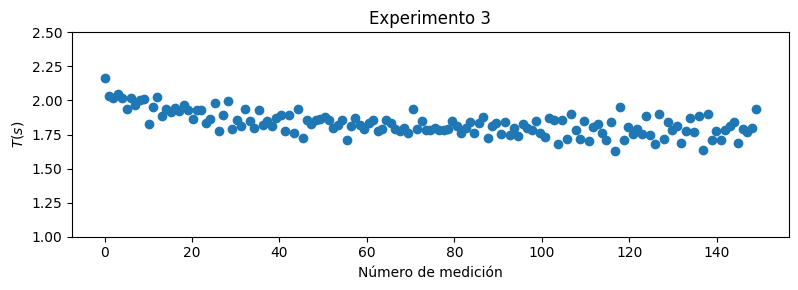

In [ ]:
#Grafico de los datos despues de limpieza

os.makedirs("resultados/limpio", exist_ok=True)

for i in range(0,3) :

  plt.figure(figsize=(8,3))
  plt.scatter(np.linspace(0,len(T[i]),len(T[i])),T[i])
  plt.title(f"Experimento {i+1}")
  plt.xlabel("Número de medición")
  plt.ylabel("$T(s)$")
  plt.ylim(1,2.5)
  plt.tight_layout()
  plt.savefig(f"resultados/limpio/Experimento_{i+1}_limpio.png",dpi=200, bbox_inches="tight")
  plt.show()

tras lo que se puede ver que resultan datos mucho mas adecuados.

$\ $

Concretamente, se puede comentar :

- **Experimento 1** : Los datos parecen seguir una tendencia central, constante en función del número de medición, con una disperción aleatoria al rededor de el.
- **Experimento 2 y 3** : Ambos tienen en común el hecho de que pareciera disminuir el valor de $T$ al avanzar el número de medición, inicialmente, aunque tienden a estabilizarse en un valor. En particular :

  - *Experimento 2* : El valor en el que se estabiliza es menor al del experimento 1
  - *Experimento 3* : El valor en el que se estabiliza es aproximadamente igual al del experimento 1

$\ $

  Aunque por ahora esto solo es un comentario, y requeriría de un análisis mas para confirmarlo.

  Para reforzar esta evidencia, se partirá el intervalo total en intervalos mas pequeños donde se analizará el periodo promedio de $n$ oscilaciones consecutivas. De esta manera lo que se busca es disminuir el impacto de los errores humanos de medición y poder visualizar una tendencia y su evolución.

In [ ]:
#Partición en intervalos y calculo de promedio en estos

def Tendencia(X,n):
  return [np.mean(X[j:j+n]) for j in range(0, len(X), n)]

n=6

T0=[np.array(Tendencia(T[i],n))for i in range(0,3)]

y se grafica ahora, las tendencias del periodo de cada experimento a lo largo de los intervalos:

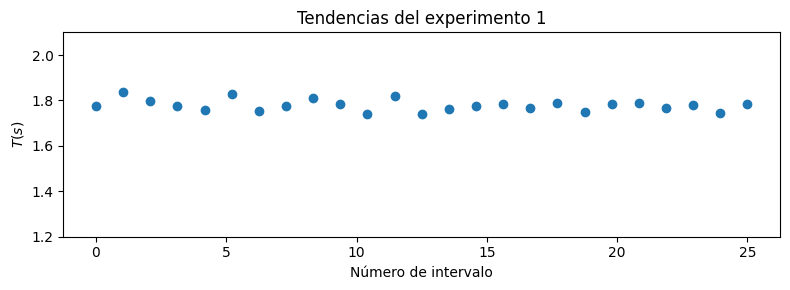

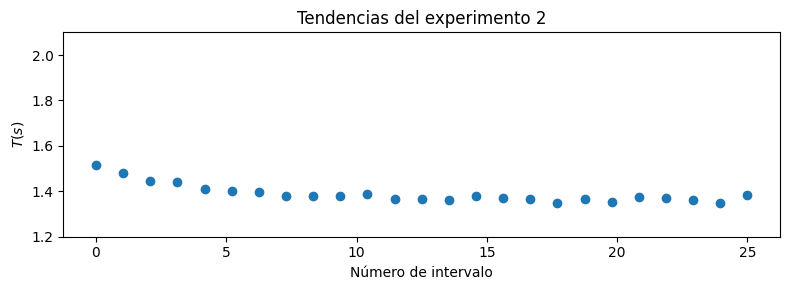

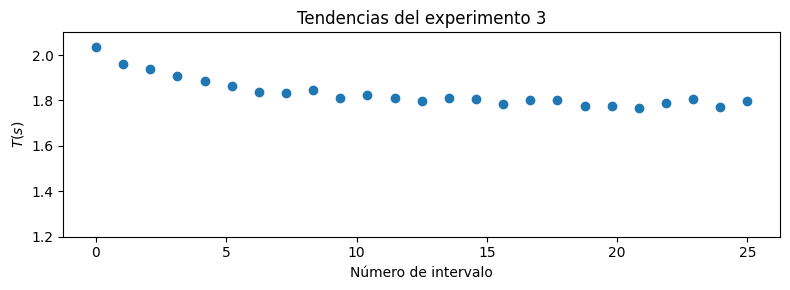

In [ ]:
os.makedirs("resultados/tendencias", exist_ok=True)

#Grafico de tendencias

for i in range(0,3) :

  plt.figure(figsize=(8,3))
  plt.scatter(np.linspace(0,len(T0[i]),len(T0[i])),T0[i])
  plt.title(f"Tendencias del experimento {i+1}")
  plt.xlabel("Número de intervalo")
  plt.ylabel("$T(s)$")
  plt.ylim(1.2,2.1)
  plt.tight_layout()
  plt.savefig(f"resultados/tendencias/Tendencias del experimento {i+1}.png",dpi=200, bbox_inches="tight")
  plt.show()

Esto refuerza aun mas los comentarios hechos, pero para sacar conclusiones será apropiado comparar en un mismo gráfico, experimentos comparables :

$\ $

**Experimento 1 vs 3** : Recordando que en ambos se midió con una misma longitud de hilo $L=76.5cm$ , lo que varía entre experimentos es el angulo inicial $\alpha$, que resultó $45°$ para el primero y $90°$ para el número 3. Al comparar los gráficos :

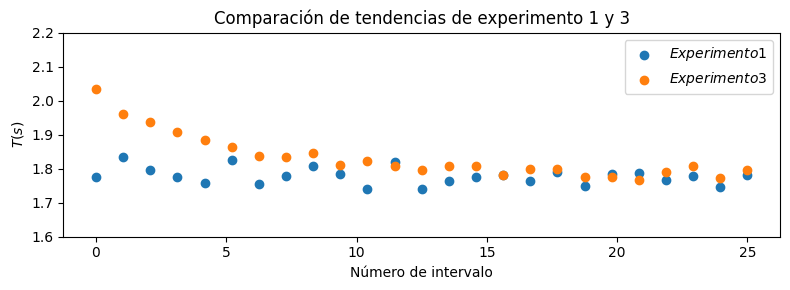

In [ ]:
os.makedirs("resultados/comparaciones", exist_ok=True)

#Grafico de comparación de experimentos 1 y 3

plt.figure(figsize=(8,3))
plt.scatter(np.linspace(0,len(T0[0]),len(T0[0])),T0[0],label="$Experimento 1$")
plt.scatter(np.linspace(0,len(T0[2]),len(T0[2])),T0[2],label="$Experimento 3$")
plt.title("Comparación de tendencias de experimento 1 y 3")
plt.xlabel("Número de intervalo")
plt.ylabel("$T(s)$")
plt.ylim(1.6,2.2)
plt.legend()
plt.tight_layout()
plt.savefig(f"resultados/comparaciones/Comparación 1 y 3.png",dpi=200, bbox_inches="tight")
plt.show()

se puede ver que si bien ambos tienden al mismo valor aproximado, en el experimento 1,  $T$ se mantiene aproximadamente constante y en el experimento 3 va decreciendo.

Esto verifica experimentalmente lo predicho por la teoría, de que $T$ no depende de $\alpha$ aunque esta predicción es poderosa para valores de $\alpha$ pequeños. Este detalle es la clave que explica porque el experimento 3 no se comporta como el 1 inicialmente, pues empiezá con un angulo inicial bastante mas grande, donde su comportamiento no es modelado precisamente por la teoría.

El hecho de que tiendan al mismo valor se debe a que :
- Tienen el mismo largo $L$ que es lo único que define el valor de $T$
- Por rozamiento de la cuerda y del peso con el aire, el péndulo va reduciendo el ángulo máximo de oscilación, llegando eventualmente a pequeños ángulos, cumpliendo las condiciones de la teoría.

$\ $

**Experimento 2 vs 3** : Recordando que en ambos se midió con un mismo angulo inicial $\alpha=90°$, lo que varió entre experimentos esta vez fue la longitud de hilo $L$ que fue de $40,5cm$ para el experimento 2 y $76.5cm$ para el número 6. Al comparar los gráficos :

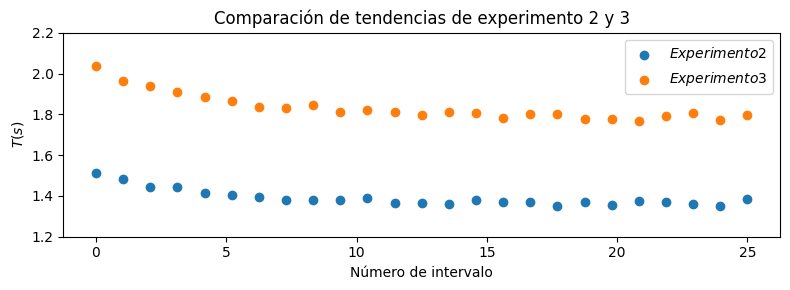

In [ ]:
#Grafico de comparación de experimentos 2 y 3

plt.figure(figsize=(8,3))
plt.scatter(np.linspace(0,len(T0[1]),len(T0[1])),T0[1],label="$Experimento 2$")
plt.scatter(np.linspace(0,len(T0[2]),len(T0[2])),T0[2],label="$Experimento 3$")
plt.title("Comparación de tendencias de experimento 2 y 3")
plt.xlabel("Número de intervalo")
plt.ylabel("$T(s)$")
plt.ylim(1.2,2.2)
plt.legend()
plt.tight_layout()
plt.savefig(f"resultados/comparaciones/Comparación 2  y 3.png",dpi=200, bbox_inches="tight")
plt.show()

se puede ver que los valores de $T$ fueron siempre mayopr para el péndulo del experimento 3 que el del 2. Esto verifica experimentalmente lo predicho por la teoría, pues en la ecuación $T=2\pi\sqrt{\frac{L}{g}}$ se puede ver que a mayor $L$ mayor $T$.

 Además por otra parte ambos tienen un comportamiento similar,en el sentido de que $T$ fue decreciendo al principio y se fue estabilizando en un valor final. Esto último es lógico, como se comentó antes, por el hecho de que el ángulo inicial no era pequeño.

### 2.3 Calculo de $T$

La manera adecuada de calcular un valor de $T$ en función de los datos de un experimento sería
- Calculando su *promedio*, para obtener su *valor mas probable*
- Calculando su *desvio estandar* para obtener su *error de medición*


$\ $

Ahora que se vieron y analizaron los datos, se puede conjeturar que el *experimento 1* es el adecuado para medir el periodo de un péndulo, pues parecía tener una tendencia central constante a lo largo del experimento.
Pero hay algunos análisis mas que se pueden hacer para asegurar esta elección, pues al elegir esta manera de calcular  $T$,  se está suponiendo que sus mediciones son una *variable aleatoria* con *distribución normal* :

#### $i.$ *Histogramas*

Esta suposición implicaría que un histograma de las mediciones de $T$ debería tener una forma aproximada a una *campana de Gauss*. A continuación se harán histogramas para cada experimento con el fin de evaluar su forma

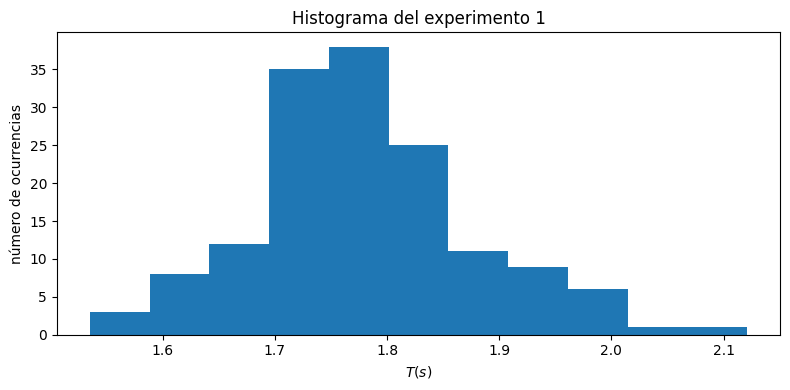

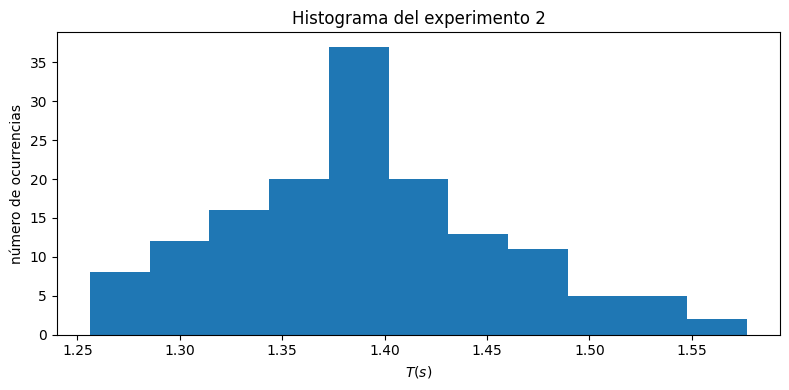

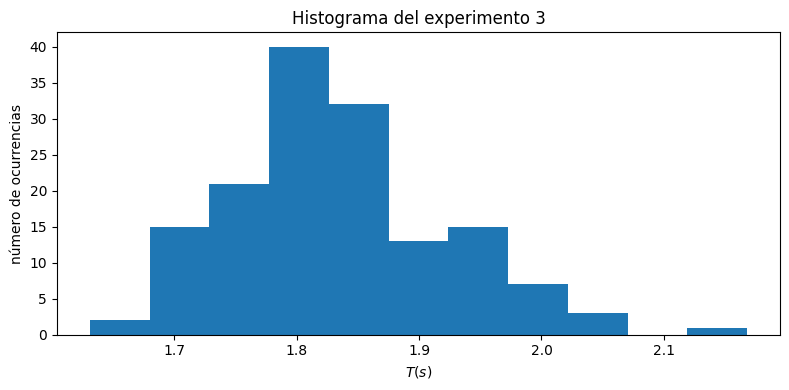

In [ ]:
os.makedirs("resultados/estadistica", exist_ok=True)
os.makedirs("resultados/estadistica/histogramas", exist_ok=True)

#Graficos de histogramas

N=11
for i in range(3) :
  plt.figure(figsize=(8,4))
  plt.hist(T[i],bins=N)
  plt.title(f"Histograma del experimento {i+1}")
  plt.ylabel("número de ocurrencias")
  plt.xlabel("$T(s)$")
  plt.tight_layout()
  plt.savefig(f"resultados/estadistica/histogramas/Histograma_{i+1}.png")
  plt.show()

que para ser sincero,no ayuda a inclinarse por algún experimento en particular. Aunque por suerte no es la única herramienta que se dispone :

#### $ii.$ *Distribución de errores*

Otra implicancia de esta suposición es que los *errores* (es decir, la diferencia de cada medición con el promedio) también debe ser una variable aleatoria por si mismo. Estudiar la distribución de los errores a lo largo del experimento es una buena manera cualitativa de juzgar si la suposición de _aleatoriedad_ es buena o no :

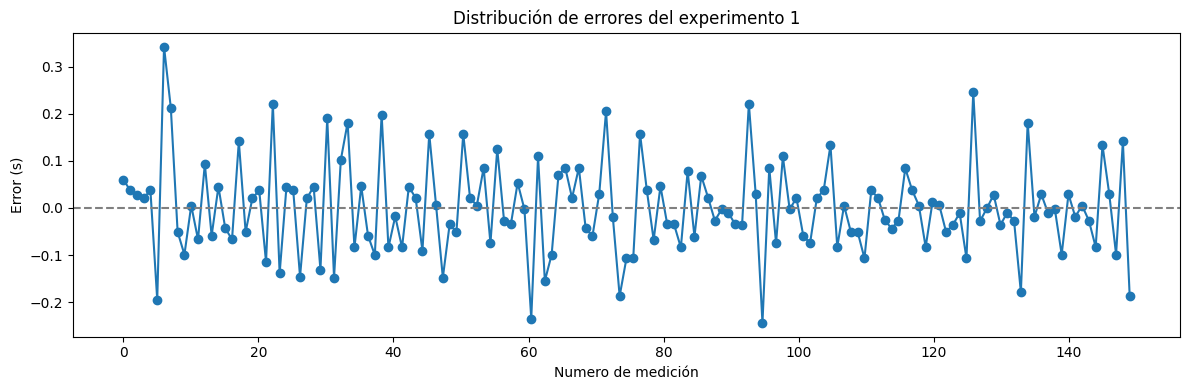

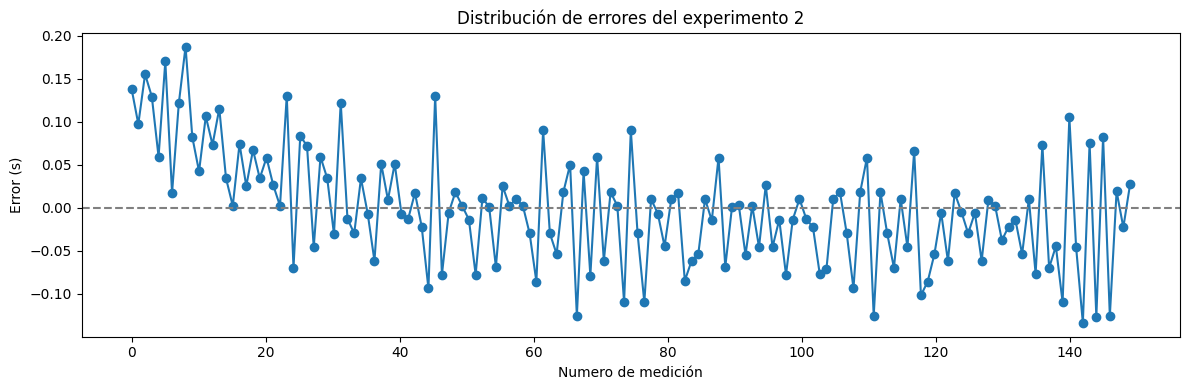

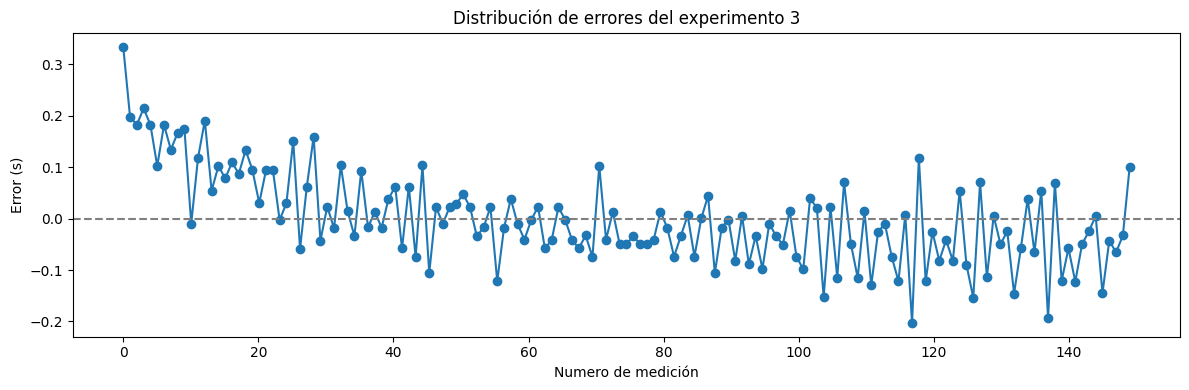

In [ ]:
#Calculo de promedio y definicion de Error

os.makedirs("resultados/estadistica/errores", exist_ok=True)

T_prom=[np.mean(T[i]) for i in range(3)]

E=[T[i]-T_prom[i] for i in range(3)]

#Grafico de distribución de errores

for i in range(3):
  plt.figure(figsize=(12,4))
  plt.scatter(np.linspace(0,len(E[i]),len(E[i])),E[i])
  plt.plot(np.linspace(0,len(E[i]),len(E[i])),E[i])
  plt.xlabel("Numero de medición")
  plt.ylabel("Error (s)")
  plt.title(f"Distribución de errores del experimento {i+1}")
  plt.axhline(0,color="gray",linestyle="--")
  plt.tight_layout()
  plt.savefig(f"resultados/estadistica/errores/Distribucion de errores {i+1}.png")
  plt.show()


En este caso, si aporta algo, y es el hecho de que en el experimento 1, y a diferencia de los otros 2, los errores se distribuyen aleatoriamente respecto del 0. En los experimentos 2 y 3, se puede ver claramente que al principio los errores tienden a ser positivos y al fianl negativos, lo que indica un patrón y por tanto falta de *aleatoriedad*.

#### Cálculo y comparación

Con esto, ahora si se puede elegir al experimento 1 (el péndulo de $L=76.5cm$ y calcular su valor medido de $T$

In [ ]:
#Calculo de desvio estandar

dT=np.std(T)

print("Valor medido de T =",round(T_prom[0],3), "s" )
print("Valor medido del error de T =", round(dT,3),"s")

Valor medido de T = 1.779 s
Valor medido del error de T = 0.215 s


Con lo que se concluye en una medición de :  $T=(1,779 \pm 0.215)s$

Observación : se redondeó a 3 cifras significativas porque es lo que tiene sentido teniendo en cuenta la precisión de las mediciones.

$\ $

**Comparación con la teoría** : si se recuerda la fórmula de

$$T=2\pi\sqrt{\frac{L}{g}}$$

se puede ver que se puede calcular un valor de $T$ teórico, en función de la medición de $L$. Aunque cabe aclarar que esta tiene un error asociado en su medición y por ende el cálculo de $T$ de esta manera también. No se entrará en detalles, pero el método de *propagacion de errores* predice un error para el $T$ teórico, de $$\Delta T=2\pi \sqrt{\frac{1}{2gL}}.\Delta L$$

donde $\Delta L=0,1cm$ es el error en la medición de $L$ con una regla.Con todo esto, y usando un valor de $g=9,8\  m/s^2$, se calcula el valor teórico de $T$ :

In [ ]:
#Calculo de valor teórico de T

L=0.765
dL=0.001
g=9.8

T_teo= 2*np.pi * np.sqrt(L/g)
dT_teo= 2*np.pi * np.sqrt(1/2*g*L)*dL

print("Valor teórico de T =",round(T_teo,3), "s" )
print("Valor del error teórico de T =", round(dT_teo,3),"s")

Valor teórico de T = 1.755 s
Valor del error teórico de T = 0.012 s


Con lo que se concluye en valor teórico de :  $T=(1,755 \pm 0.012)s$. Pareciera entonces que la medición experimental es buena en comparación a la teórica. Aunque para mas claridad, conviene visualizarlo de forma gráfica, comparando ambos intervalos :

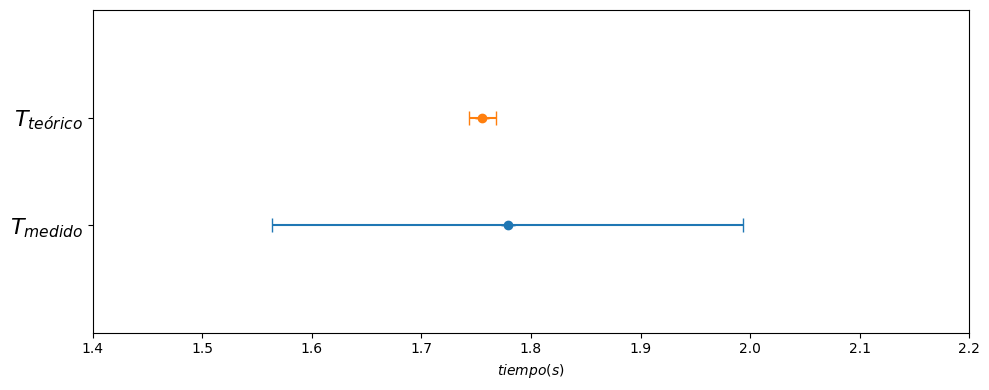

In [ ]:
#Comparacion del valor medido con valor teorico

plt.figure(figsize=(10,4))
plt.errorbar(T_prom[0],1,xerr=dT,yerr=0,capsize=5)
plt.errorbar(T_teo,1.1,xerr=dT_teo,yerr=0,capsize=5)
plt.scatter(T_prom[0],1)
plt.scatter(T_teo,1.1)
plt.yticks([1,1.1],["$T_{medido}$","$T_{teórico}$"],fontsize=16)
plt.xlabel("$tiempo(s)$")
plt.xlim(1.4,2.2)
plt.ylim(0.9,1.2)
plt.tight_layout()
plt.savefig(f"resultados/estadistica/Comparación teórica.png")
plt.show()


De lo que se puede conluir que la medición de $T$ fue bastante *exacta*, en el sentido de que su valor central está bastante cerca del teórico, aunque no fue muy *precisa* en el sentido de que tiene un error considerable, en relación a su magnitud ( lo que se conoce como *error relativo*).

## 3. *Conclusiones*

En retrospectiva, se puede concluir sobre el proyecto que :

Mediante

- El uso de python y la importación de librerias externas
- La visualización, trabajo y análisis de datos
- La aplicación de conceptos básicos de estadística y física

Se logró

- Estudiar la dependencia de $T$ respecto de parámetros
- Decidir que experimento era el adecuado para calcular $T$
- Calcular $T$
- Validar los resultados, comparándolos con lo predicho por la teoría
